# The Rundown

The overall idea was that we'd take three submetrics to determine what the "best neighborhood" is via the information found (y'know... like everyone else!). We found three data sets we were interested in: one that went over arrests in Allegheny County, one that touched on trees within Allegheny County, and the last of which went over what types of courts/rinks could be found in Allegheny County--all of which will account for our overall metric, which is **Safe Entertainment**.

## The Tree Submetric

The idea for the tree submetric went as follows: *"How many Tree of Heaven's are there?"*. While it sounds strange, the reasoning behind this is that Tree of Heaven's are an invasive tree species. According to The Nature Conservatory, the Tree of Heaven kills native plants and can have a negative effect on the roads and sidewalks in the Pittsburgh area (*https://www.nature.org/en-us/about-us/where-we-work/united-states/indiana/stories-in-indiana/journey-with-nature--tree-of-heaven/*). This contributes to our overall metric as, if the pavement around asphalt courts aren't in tact, it's not exactly safe for people to use (tripping can occur, for example. If someone trips and lands on their face all the time, that's not really a safe form of entertainment). Also, invasive trees have a negative affect on our environment, which partially contributes to the "safe" portion of our metric--you don't want to live in a neighborhood that doesn't have a healthy environment, whether that be because of the toxins spread that harm other plants or the potential infrastructure damage. Most people, most likely, would prefer to live in a neighborhood that is pleasant to look at and not at risk for environmental damage.

#### The Tree:
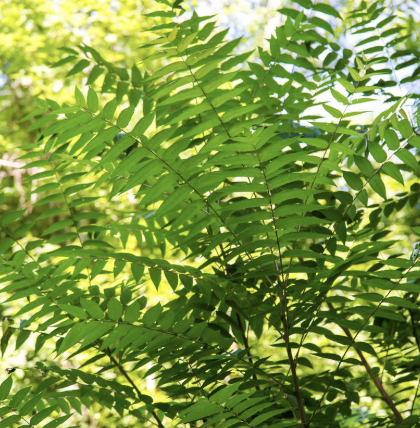

*via: "https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.nature.org%2Fen-us%2Fabout-us%2Fwhere-we-work%2Funited-states%2Findiana%2Fstories-in-indiana%2Fjourney-with-nature--tree-of-heaven%2F&psig=AOvVaw3SNZvYITLRcOxZZOQTR4rv&ust=1763325700039000&source=images&cd=vfe&opi=89978449&ved=0CBkQjhxqFwoTCJjg0aGC9ZADFQAAAAAdAAAAABAJ"

## The Arrests Submetric

The idea for the arrests submetric goes as follow: *"How many arrests occur in each neighborhood?"*. We wanted to determine the arrests that occur in each neighborhood, and line them up with the information we got from the tree dataset--basically, what's the lowest crime rate out of the neighborhoods we found to have the least amount of Tree of Heaven's, and can we line them up well/without issue?

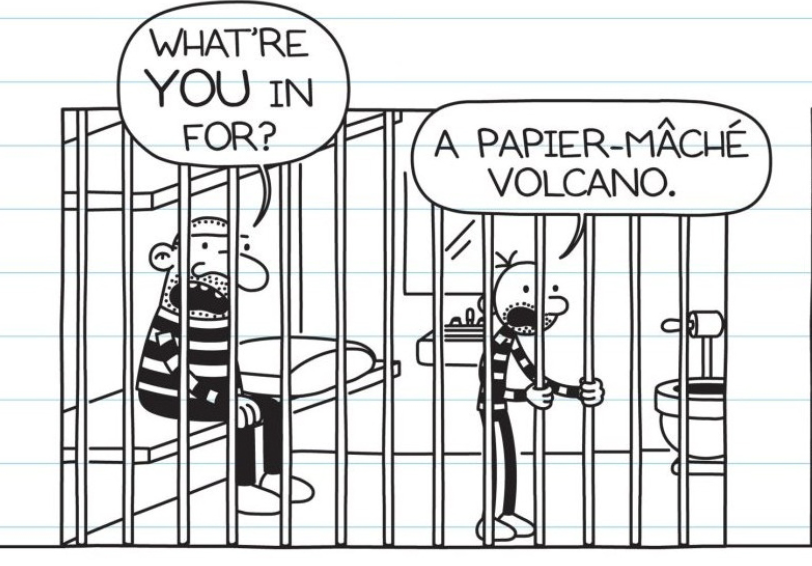

## The Courts/Rinks Submetric

The courts/rinks dataset contributes to the "entertainment" portion of our overall metric. You want a neighborhood that as a lot to do--a neighborhood with a park, or maybe a basketball court (yknow... courts/rinks...). Something to keep you, your children, your dog, whatever it is entertained in your free time! It was important, when picking, that we did something that tied back to entertainment, and I (read: Sophie) felt as though courts/rinks was a good alternative to simple playgrounds. The idea for the ranking was simply, *"Which neighborhood has the most courts/rinks?"*, excluding anything with NaN or *'Dead'*. 

## Who doesn't love a good basketball court?:
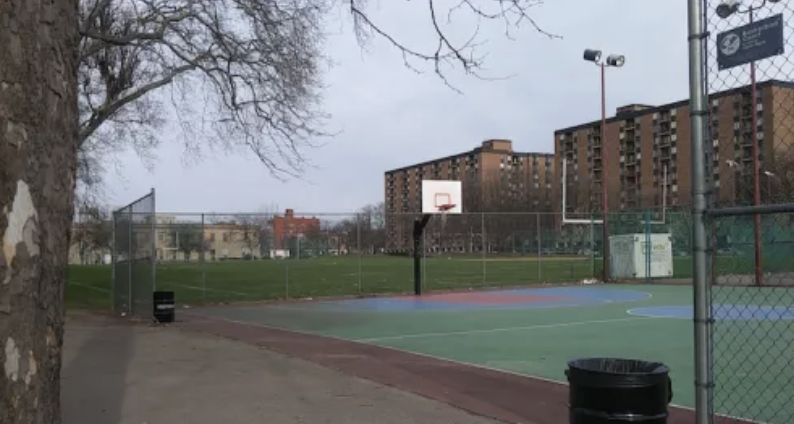

*via "https://nextpittsburgh.com/features/pittsburghs-5-best-outdoor-basketball-courts/"*

## The Conclusion

We ended up boiling the "Best Neighborhood" based off Safe Entertainment as **Highland Park**. Our reasoning behind this? Great question!

Sophie A.
So, first off, Highland Park stands out as one of the neighborhoods with only ONE tree. Also, while it comes in second for courts/rinks, we noticed that Squirrel Hill South ranks a lot higher in terms of arrests AND tree count--so that's off the table, like how Hazelwood ranks third in courts/rinks but has a TON of trees, and ranks way higher on the arrests data set too. Now, there are most definitely going to be neighborhoods that rank better that Highland Park if we just took into account the arrests data set. But when you take a look at all the sets combined, Highland Park truly stands out for our overall metric! It makes no sense using extra data that doesn't show up on the other data sets/ranked "poorer" based off of individual metrics.

Sophia E.
Highland Park is the neighborhood that ranks low in crime and relatively high in the other two data sets making it stand out more to me. Like Sophie said, both Squirrel Hill South and Hazelwood rank pretty well in the trees of heaven and rink/courts but also rank higher in arrests, which matter the most to us in terms of safe entertainment. When you look at all the data sets combined, Highland Park comes to be the best neighborhood for our metric!

# THE DATA

*Below, we have all our data collected within this .ipynb notebook. This specific section contains Sophie A's tree data.*

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
arrests_data = pd.read_csv('arrests.csv', low_memory = False)
sports_data = pd.read_csv('sports.csv', low_memory = False)
trees_data = pd.read_csv('tree.csv', low_memory = False)
tr = pd.read_csv('tree.csv', low_memory=False)

In [7]:
tr = tr.dropna()
tree_count = tr.iloc[:, [4, 15, 49]]
query_mask = tree_count['common_name'].str.contains("Tree-of-Heaven", case=False, na=True) & (tree_count['condition'] != 'Dead')
trees = tree_count[query_mask]
total_heav = trees.groupby('neighborhood').size().rename('count')
sor = total_heav.sort_values(ascending=False)
ind = sor.reset_index()
ind

,neighborhood,count
0,Greenfield,15
1,Hazelwood,13
2,East Hills,9
3,Knoxville,9
4,Middle Hill,9
5,Homewood North,8
6,Lincoln-Lemington-Belmar,8
7,Marshall-Shadeland,8
8,Squirrel Hill South,8
9,Brighton Heights,6


Text(0.5, 1.0, 'Amount of Tree-of-Heavens in a Neighborhood')

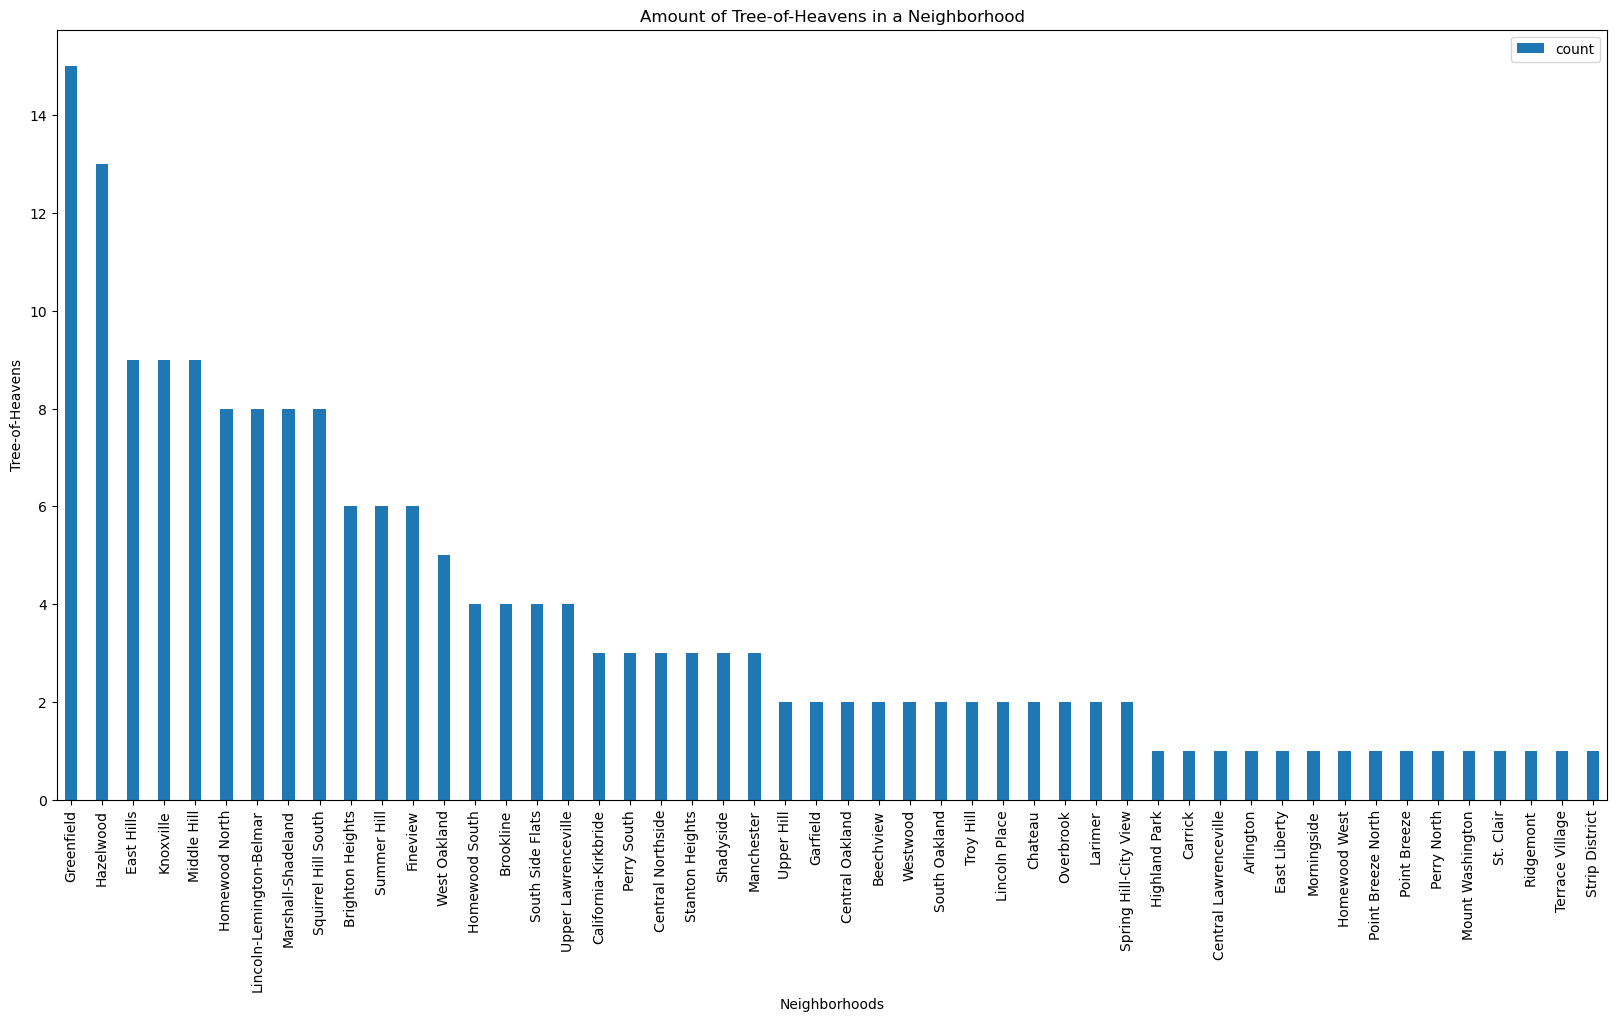

In [4]:
tr_plt = ind.plot(x='neighborhood', y='count', kind='bar', width=.4, figsize=(20, 10))
tr_plt.set_xlabel('Neighborhoods')
tr_plt.set_ylabel('Tree-of-Heavens')
tr_plt.set_title('Amount of Tree-of-Heavens in a Neighborhood')

# THE DATA, Pt. 2

*The data now continues, using Sophia E's tree data.*

In [24]:
name_column = {
    'trees_data': 'neighborhood',
    'arrests_data': 'Neighborhood',
    'sports_data': 'Neighborhood'
}
# Line above was slightly tweaked by Sophie A, as the code had an error when ran (wouldn't take the 
# name_column due to trees_data using a lowercase n).

trees_of_heaven = trees_data[
    (trees_data['common_name'].str.contains("Tree-of-Heaven", case = False, na = False)) & 
    (trees_data['condition'] != 'Dead')
].copy()

neighborhoods_with_toh = set(trees_of_heaven[name_column['trees_data']].dropna().unique())
# Line above tweaked to use the trees_data within dictionary

common_names = neighborhoods_with_toh & set(sports_data[name_column['sports_data']].dropna()) & set(arrests_data[name_column['arrests_data']].dropna())
# Line above was slightly tweaked by Sophie A, has the code had an error when ran.

trees_common = trees_of_heaven[trees_of_heaven[name_column['trees_data']].isin(common_names)].copy()
sports_common = sports_data[sports_data[name_column['sports_data']].isin(common_names)].copy()
arrests_common = arrests_data[arrests_data[name_column['arrests_data']].isin(common_names)].copy()
# All three lines above tweaked for similar reasons to neighborhoods_with_toh

In [34]:
arrests_by_neighborhood = arrests_common[name_column['arrests_data']].value_counts().reset_index()
arrests_by_neighborhood.columns = ['Neighborhood', 'Count']
arrests_by_neighborhood = arrests_by_neighborhood.sort_values('Count', ascending = False)

arrests_45 = arrests_by_neighborhood.tail(45)

print("\n" + "="*40)
print("        ARRESTS BY NEIGHBORHOOD")
print("="*40)
print(arrests_45.to_string(index = False))
print("="*40)
# Changed 'arrests_10' to 'arrests_45' to see neighborhoods clearer -Sophie A.


        ARRESTS BY NEIGHBORHOOD
            Neighborhood  Count
        South Side Flats   2508
                 Carrick    886
            East Liberty    761
              East Hills    531
      Marshall-Shadeland    512
        Mount Washington    457
               Brookline    438
             Middle Hill    430
       Central Northside    424
        Brighton Heights    411
             Perry South    396
               Shadyside    388
        Allegheny Center    373
               Hazelwood    372
     Squirrel Hill South    316
                 Larimer    311
               Beechview    270
                Garfield    252
               Troy Hill    244
      Point Breeze North    217
Lincoln-Lemington-Belmar    212
           South Oakland    204
         Terrace Village    199
              Greenfield    186
         Central Oakland    184
             Perry North    177
           Highland Park    174
          Strip District    156
     Squirrel Hill North    156
       

In [70]:
arrests_common['Offense_Category'] = arrests_common['ArrestCharge_Felony_Misdemeanor_Description'].str.split(' - ').str[0]
arrests_by_neighborhood = arrests_common.groupby(['Neighborhood', 'Offense_Category']).size().reset_index(name = 'Number of Arrests')

pivot_table = arrests_common.pivot_table(
    index = 'Neighborhood', 
    columns = 'Offense_Category',
    values = 'ArrestCharge_Felony_Misdemeanor_Description',
    aggfunc = 'count',
    fill_value = 0
)

pivot_table = pivot_table.sort_values('FELONY', ascending = False)
pivot_table_20 = pivot_table.tail(20)
# same changes as to arrests table was made here. -Sophie A

print("\n" + "="*60)
print("        ARRESTS (OFFENSE CATEGORY) BY NEIGHBORHOOD")
print("="*60)
print(pivot_table_20.to_string())
print("="*60)


        ARRESTS (OFFENSE CATEGORY) BY NEIGHBORHOOD
Offense_Category       FELONY  INFRACTION  MISDEMEANOR
Neighborhood                                          
Perry North                44          27           88
Troy Hill                  42          49          120
Manchester                 39          20           76
Highland Park              39          32           76
Homewood West              30          34           61
Central Oakland            30          52           75
South Oakland              29          65           96
Squirrel Hill North        27          40           62
Strip District             25          30           87
Point Breeze North         18          32           72
Fineview                   16           9           53
Lincoln Place              16          20           60
Point Breeze               16          25           37
Central Lawrenceville      15          19           66
Upper Hill                 13           5           32
Greenfield   

Text(0.5, 1.0, 'Amount of Arrests in a Neighborhood')

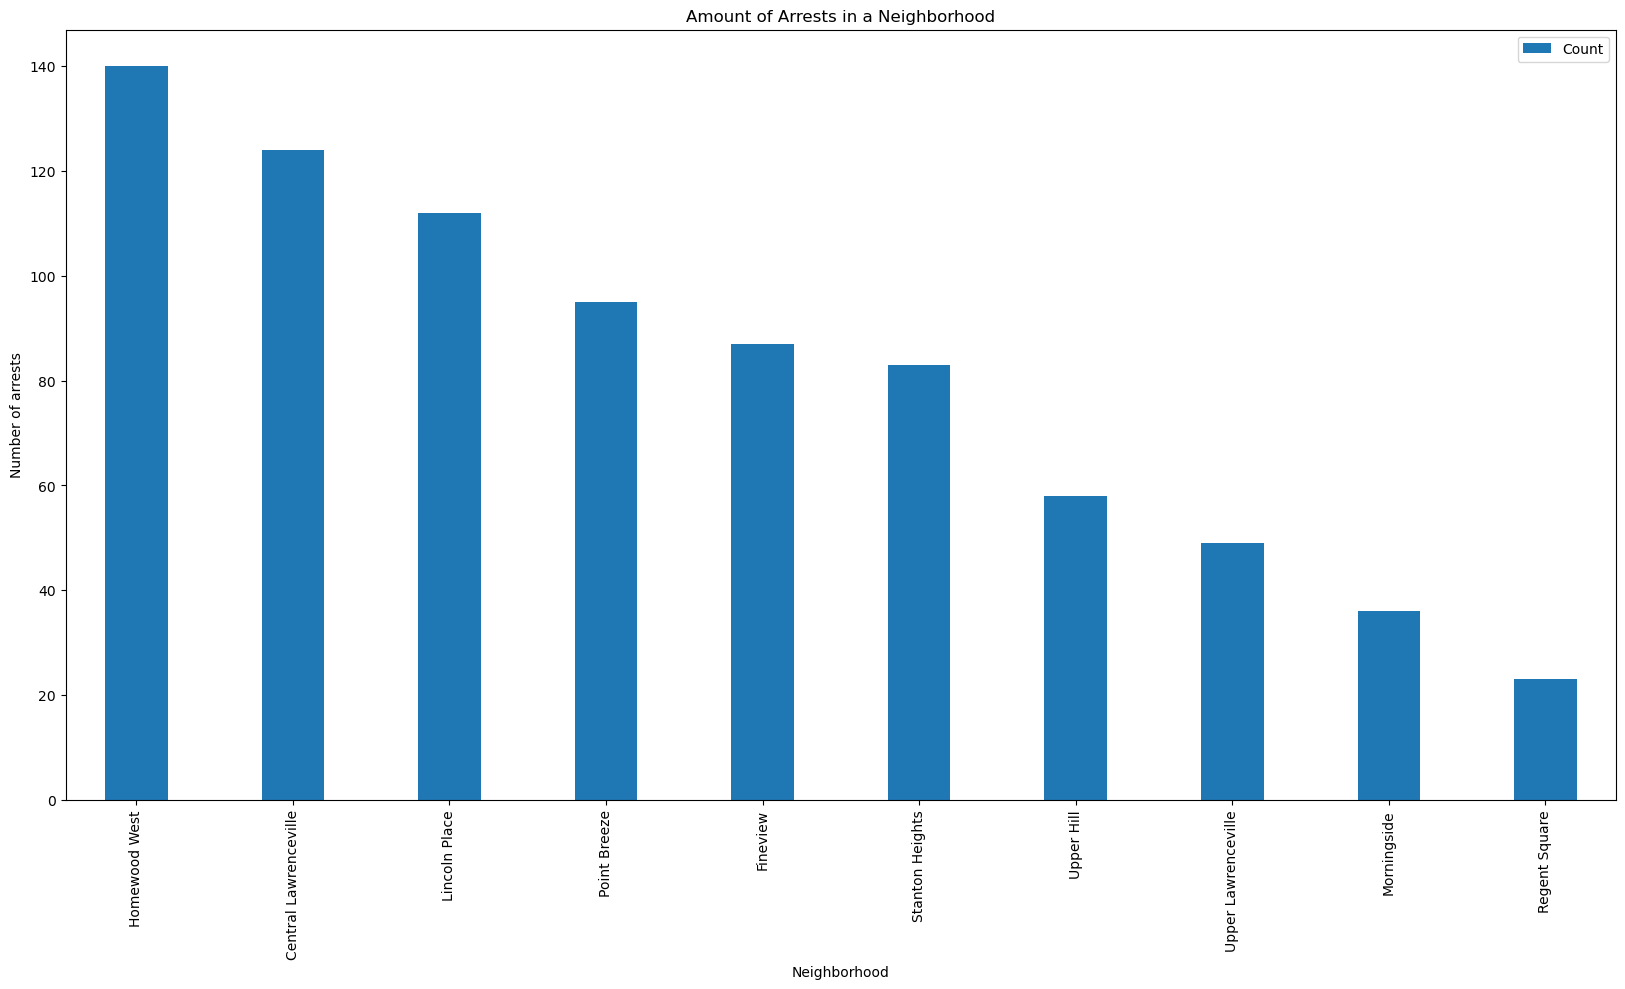

In [43]:
# arrests visual
arrests_by_neighborhood = arrests_common[name_column['arrests_data']].value_counts().reset_index()
arrests_by_neighborhood.columns = ['Neighborhood', 'Count']
arrests_by_neighborhood = arrests_by_neighborhood.sort_values('Count', ascending = False)
arrests_10 = arrests_by_neighborhood.tail(10)

arrests_plt = arrests_10.plot(x = 'Neighborhood', y = 'Count', kind = 'bar', width = .4, figsize = (20, 10))
arrests_plt.set_xlabel('Neighborhood')
arrests_plt.set_ylabel('Number of arrests')
arrests_plt.set_title('Amount of Arrests in a Neighborhood')

# Edited unnecessary code, fixed name_column error

In [48]:
sports_by_neighborhood = sports_common[name_column['sports_data']].value_counts().reset_index()
sports_by_neighborhood.columns = ['Neighborhood', 'Count']
sports_by_neighborhood = sports_by_neighborhood.sort_values('Count', ascending = False)

sports_10 = sports_by_neighborhood.head(10)

print("\n" + "="*50)
print("        COURTS AND RINKS BY NEIGHBORHOOD")
print("="*50)
print(sports_10.to_string(index = False))
print("="*50)


        COURTS AND RINKS BY NEIGHBORHOOD
       Neighborhood  Count
Squirrel Hill South     26
      Highland Park     20
          Hazelwood     10
   Allegheny Center      9
          Brookline      9
          Troy Hill      8
          Beechview      7
      Regent Square      6
         Manchester      6
       East Liberty      6


Text(0.5, 1.0, 'Amount of Sports Facilities in a Neighborhood')

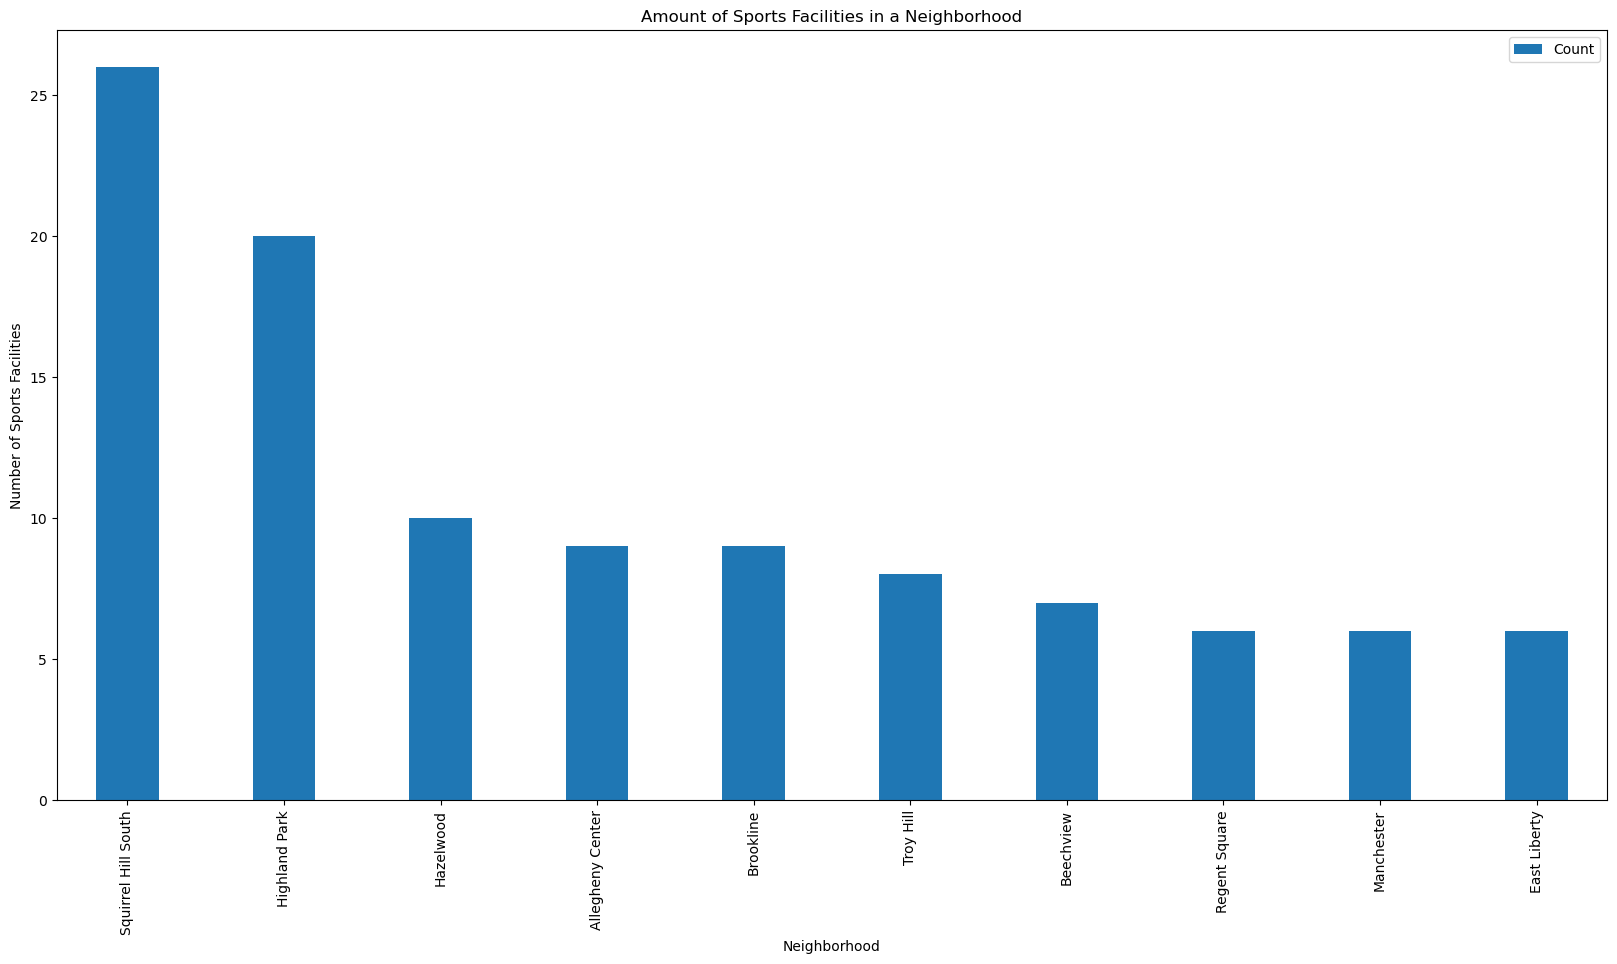

In [50]:
sports_10 = sports_by_neighborhood.head(10)

sports_plt = sports_10.plot(x = 'Neighborhood', y = 'Count', kind = 'bar', width = .4, figsize = (20, 10))
sports_plt.set_xlabel('Neighborhood')
sports_plt.set_ylabel('Number of Sports Facilities')
sports_plt.set_title('Amount of Sports Facilities in a Neighborhood')

# same changes as made to the arrests visualization

In [75]:
total_heav = trees.groupby('neighborhood').size().rename('count')
sor = total_heav.sort_values(ascending = True)
ind = sor.reset_index()

ind_10 = ind.head(10)

print("\n" + "="*50)
print("         TREES OF HEAVEN BY NEIGHBORHOOD")
print("="*50)
print(ind_10.to_string(index = False))
print("="*50 + "\n")

# Same edits for this as made to arrests list -Sophie A. Also edited it to be in descending order to get neighborhoods
# with one count of trees of heavens


         TREES OF HEAVEN BY NEIGHBORHOOD
         neighborhood  count
            Arlington      1
              Carrick      1
Central Lawrenceville      1
         East Liberty      1
          Morningside      1
     Mount Washington      1
        Homewood West      1
        Highland Park      1
          Perry North      1
            Ridgemont      1



In [79]:
total_heav = trees.groupby('neighborhood').size().rename('count')
sor = total_heav.sort_values(ascending = False)
ind = sor.reset_index()

ind_10 = ind.head(10)

print("\n" + "="*50)
print("         TREES OF HEAVEN BY NEIGHBORHOOD")
print("="*50)
print(ind_10.to_string(index = False))
print("="*50 + "\n")
# same data set but from most to least rather than least to most -Sophie A.


         TREES OF HEAVEN BY NEIGHBORHOOD
            neighborhood  count
              Greenfield     15
               Hazelwood     13
              East Hills      9
               Knoxville      9
             Middle Hill      9
          Homewood North      8
Lincoln-Lemington-Belmar      8
      Marshall-Shadeland      8
     Squirrel Hill South      8
        Brighton Heights      6



Text(0.5, 1.0, 'Amount of Tree-of-Heavens in a Neighborhood')

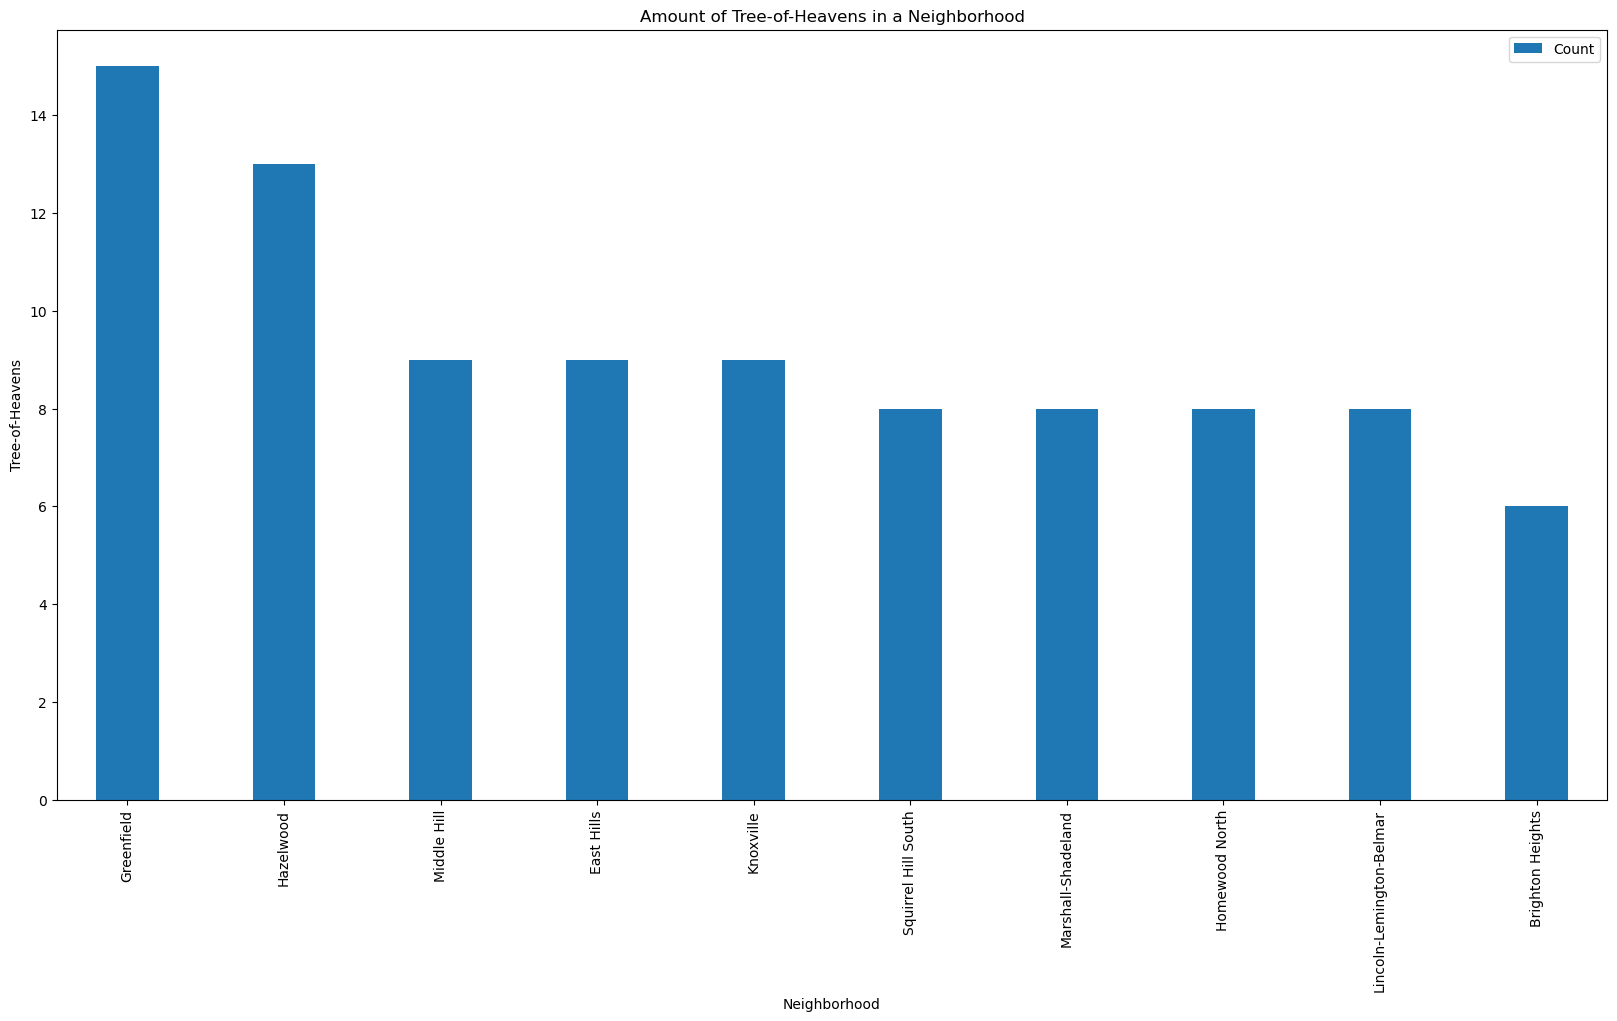

In [77]:
# displays neighborhoods with the most trees of neighborhoods to the least ( top 10 )
ind = trees[name_column['trees_data']].value_counts().reset_index()
ind.columns = ['Neighborhood', 'Count']

ind_10 = ind.head(10)

tr_plt = ind_10.plot(x = 'Neighborhood', y = 'Count', kind = 'bar', width = .4, figsize = (20, 10))
tr_plt.set_xlabel('Neighborhood')
tr_plt.set_ylabel('Tree-of-Heavens')
tr_plt.set_title('Amount of Tree-of-Heavens in a Neighborhood')